<a href="https://colab.research.google.com/github/JaminUbuntu/NLP-Coursework-Benjamin/blob/main/IBOK_NLP_DL_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 10.9 MB/s eta 0:00:00


In [ ]:
pip install transformers

In [ ]:
pip install hf_xet

# WANDB Setup

In [1]:
pip install wandb

In [2]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: zeal2shine (zeal2shine-coventry-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    report_to="wandb",        # enables W&B logging
    run_name="bert-bilstm-sentiment",  # optional: your custom run name
)

In [4]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [5]:
pip install tensorflow

# Importing Libraries and Loading Files

In [66]:
import pandas as pd
import re
import torch
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import TensorDataset
from transformers import Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from transformers import TFBertForSequenceClassification
import tensorflow as tf

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
import nlpaug.augmenter.char as nac

In [7]:
# Configuring visual settings
sb.set(style="whitegrid")

Make a list of the uploaded files

In [8]:
# Define paths to the uploaded files

file_path_1 = "/content/SemEval2017-task4-test.subtask-A.english.txt"
file_path_2 ="/content/twitter-2015train-A.txt"

Function to read each line of text

In [9]:
# Load and preprocess a single file

# Load Dataset 1 (for train/test)
data_1 = []
with open(file_path_1, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 3:
            tweet_id, label, text = parts
            data_1.append((text, label))
df1 = pd.DataFrame(data_1, columns=['text', 'label'])

# Load Dataset 2 (for validation)
data_2 = []
with open(file_path_2, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 3:
            tweet_id, label, text = parts
            data_2.append((text, label))
df2 = pd.DataFrame(data_2, columns=['text', 'label'])

In [10]:
# Setup counts of the distribution to eneable plots
print("Dataset 1 - Raw Sentiment Distribution:")
print(df1['label'].value_counts())

print("\nDataset 2 - Raw Sentiment Distribution:")
print(df2['label'].value_counts())

Dataset 1 - Raw Sentiment Distribution:
label
neutral     5937
negative    3972
positive    2375
Name: count, dtype: int64

Dataset 2 - Raw Sentiment Distribution:
label
neutral     253
positive    170
negative     66
Name: count, dtype: int64


In [11]:
print(df1.info()),
print("\n")
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12284 entries, 0 to 12283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12284 non-null  object
 1   label   12284 non-null  object
dtypes: object(2)
memory usage: 192.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    489 non-null    object
 1   label   489 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB
None


In [12]:
df1.head()

,text,label
0,#ArianaGrande Ari By Ariana Grande 80% Full ht...,neutral
1,Ariana Grande KIIS FM Yours Truly CD listening...,positive
2,Ariana Grande White House Easter Egg Roll in W...,positive
3,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,positive
4,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...,neutral


In [13]:
df2.head()

,text,label
0,I forgot how sad the first episode of the 5th ...,negative
1,Oct. 2 is almost too far away for me to wait f...,negative
2,"""(OFF TOPIC) - there is only 3 episodes on the...",neutral
3,"""@iheardavoicesay is finally catching up to me...",neutral
4,"""I downloaded the first season of #Dexter, gon...",neutral


In [14]:
print(df1.sample(3))

                                                   text     label
3018  @megynkelly good adage. i like the slogan: "Lo...  positive
5143  @ParamjitGarewal @MailOnline @BobG231 no one y...  negative
4898  https://t.co/e9laxZjApoBob Dylan Not Dark Yett...  positive


In [15]:
count_df1 = df1['label'].value_counts()

count_df1

,count
label,
neutral,5937
negative,3972
positive,2375


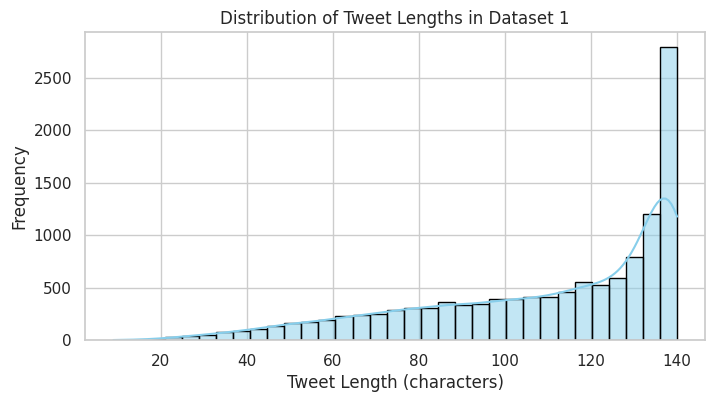

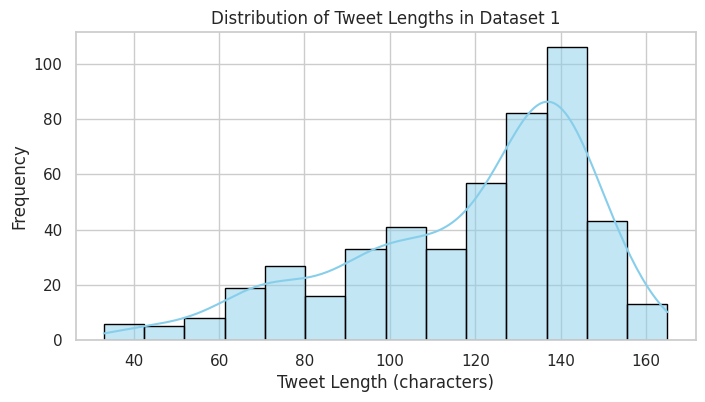

In [16]:
# Calculate text length for each dataset
df1['text_length'] = df1['text'].apply(len)
df2['text_length'] = df2['text'].apply(len)

# Plot distribution of text lengths for Dataset 1
plt.figure(figsize=(8, 4))
sb.histplot(df1['text_length'], kde=True, color="skyblue", edgecolor='black')
plt.title('Distribution of Tweet Lengths in Dataset 1')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

print("\n")

# Plot distribution of text lengths for Dataset 1
plt.figure(figsize=(8, 4))
sb.histplot(df2['text_length'], kde=True, color="skyblue", edgecolor='black')
plt.title('Distribution of Tweet Lengths in Dataset 1')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()


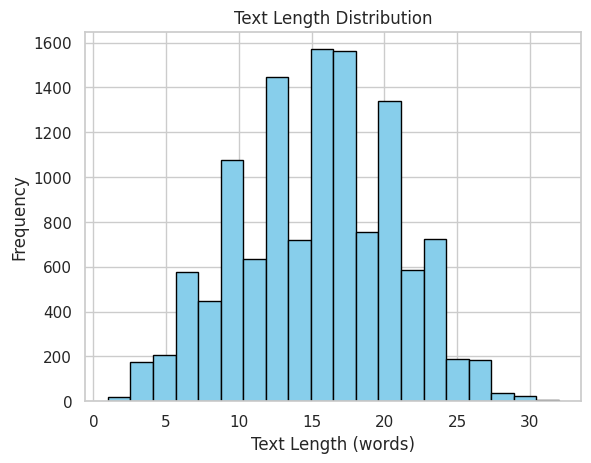

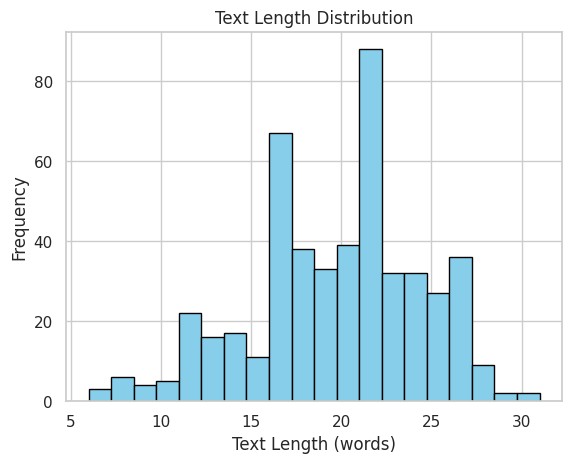

In [17]:
# Visualizing text length distribution
df1['text_length'] = df1['text'].apply(lambda x: len(x.split()))
plt.hist(df1['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

print("\n")

# Visualizing text length distribution
df2['text_length'] = df2['text'].apply(lambda x: len(x.split()))
plt.hist(df2['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

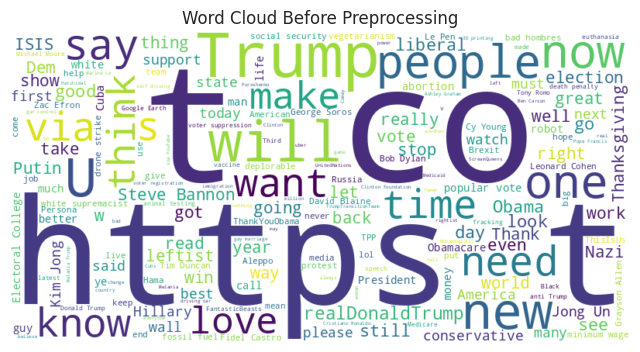

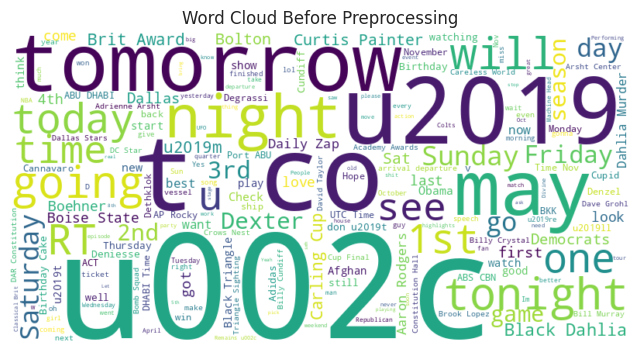

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['text']))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

print("\n")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df2['text']))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

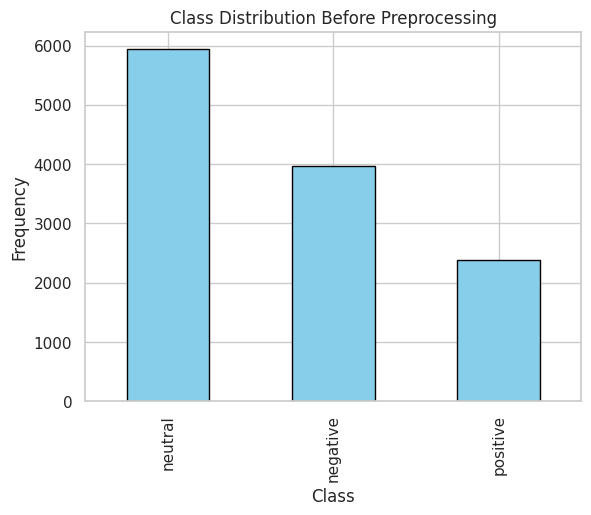

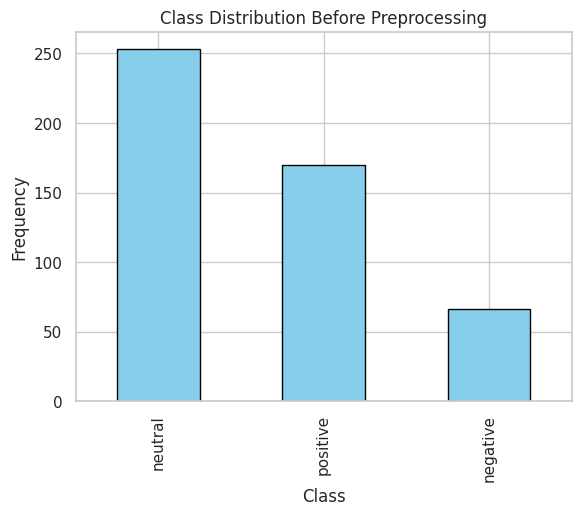

In [19]:
# Example for visualizing class distribution (for labeled data)
df1['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution Before Preprocessing')
plt.show()

print("\n")

df2['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution Before Preprocessing')
plt.show()

In [20]:
count_df2 = df2['label'].value_counts()

count_df2

,count
label,
neutral,253
positive,170
negative,66


In [21]:
df1.describe()

,text_length
count,12284.000000
mean,15.424373
std,5.408154
min,1.000000
25%,11.000000
50%,16.000000
75%,20.000000
max,32.000000


In [22]:
df2.describe()

,text_length
count,489.000000
mean,19.652352
std,4.701957
min,6.000000
25%,17.000000
50%,20.000000
75%,23.000000
max,31.000000


Checking for Null and Duplicate Values

In [23]:
def check_data_health(df, name="Dataset"):
    print(f"\n{name} - Missing Values:")
    print(df.isnull().sum())
    print(f"\n{name} - Duplicate Rows: {df.duplicated().sum()}")

check_data_health(df1, "text")
check_data_health(df2, "text")
check_data_health(df1, "label")
check_data_health(df2, "label")


text - Missing Values:
text           0
label          0
text_length    0
dtype: int64

text - Duplicate Rows: 0

text - Missing Values:
text           0
label          0
text_length    0
dtype: int64

text - Duplicate Rows: 0

label - Missing Values:
text           0
label          0
text_length    0
dtype: int64

label - Duplicate Rows: 0

label - Missing Values:
text           0
label          0
text_length    0
dtype: int64

label - Duplicate Rows: 0


In [24]:
df1

,text,label,text_length
0,#ArianaGrande Ari By Ariana Grande 80% Full ht...,neutral,11
1,Ariana Grande KIIS FM Yours Truly CD listening...,positive,13
2,Ariana Grande White House Easter Egg Roll in W...,positive,11
3,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,positive,19
4,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...,neutral,12
...,...,...,...
12279,@dansen17 update: Zac Efron kissing a puppy ht...,positive,8
12280,#zac efron sex pic skins michelle sex https://...,neutral,8
12281,First Look at Neighbors 2 with Zac Efron Shirt...,neutral,12
12282,zac efron poses nude #lovely libra porn https:...,neutral,8


In [25]:
df2

,text,label,text_length
0,I forgot how sad the first episode of the 5th ...,negative,17
1,Oct. 2 is almost too far away for me to wait f...,negative,16
2,"""(OFF TOPIC) - there is only 3 episodes on the...",neutral,21
3,"""@iheardavoicesay is finally catching up to me...",neutral,26
4,"""I downloaded the first season of #Dexter, gon...",neutral,18
...,...,...,...
484,"""Cant wait to see \""""""""Flight\"""""""" on Saturday...",positive,22
485,Gotta go see Flight tomorrow Denzel is the gre...,positive,11
486,Hey I wanna see Flight tomorrow with Denzel ol...,positive,11
487,That movie Flight with Denzel looks really goo...,positive,15


Train Test Split

In [26]:
# Split df1 into 70/30 train/test
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df1['text'], df1['label'], test_size=0.3, stratify=df1['label'], random_state=42
)

Label Encoding

In [27]:
# Combine all labels for encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

all_labels = list(train_labels) + list(test_labels) + list(df2['label'])
le = LabelEncoder()
le.fit(all_labels)

train_y = le.transform(train_labels)
test_y = le.transform(test_labels)
val_y = le.transform(df2['label'])

In [28]:
# Save label mappings
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
inv_label_map = {v: k for k, v in label_map.items()}

Text Pre-Processing Pipeline

In [29]:
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    tweet = re.sub(r"@\w+|#", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub(r"\s+", " ", tweet).strip()
    return tweet

Applying preprocessing function

In [30]:
train_texts = [clean_tweet(t) for t in train_texts]
test_texts = [clean_tweet(t) for t in test_texts]
val_texts = [clean_tweet(t) for t in df2['text']]

In [31]:
# Confirm cleaned structure
df_train_cleaned = pd.DataFrame({"text": train_texts, "label": train_y})

df_train_cleaned

#df_test_cleaned = pd.DataFrame({"text": test_texts, "label": test_y})

#df_val_cleaned = pd.DataFrame({"text": val_texts, "label": val_y})

,text,label
0,as kuffar tell me why lefties support racist f...,0
1,ripflorencehenderson angelalansbury not impres...,0
2,the people do you consider the people george s...,0
3,she fought msm gop comey racism sexism xenopho...,0
4,well said muhammad ali jinnah,2
...,...,...
8593,its a to page paper on why or why not should t...,0
8594,minimum wage is a bandaid minimum income is th...,2
8595,im making a powerpoint on how vegetarianism is...,0
8596,for confirmation well go to steve bannon of da...,1


Computing Class Weighting

In [32]:
# Compute weights from training labels
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_y),
    y=train_y
)

In [33]:
# Create dictionary for Keras use
class_weight_dict = {i: w for i, w in enumerate(class_weights_array)}

Combined Datasets for efficiency

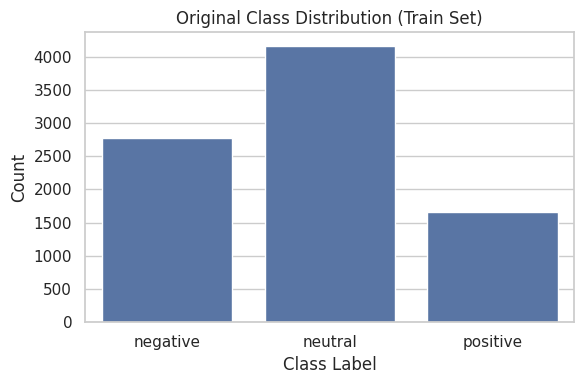

In [34]:
# Create DataFrame to visualize
label_df = pd.DataFrame({'Sentiment': [inv_label_map[i] for i in train_y]})

plt.figure(figsize=(6, 4))
sb.countplot(data=label_df, x='Sentiment', order=sorted(label_map.keys()))
plt.title("Original Class Distribution (Train Set)")
plt.ylabel("Count")
plt.xlabel("Class Label")
plt.tight_layout()
plt.show()

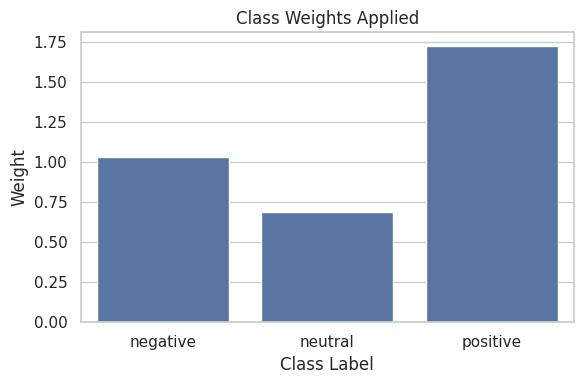

In [35]:
weight_df = pd.DataFrame.from_dict(class_weight_dict, orient='index', columns=['Weight'])
weight_df['Class'] = weight_df.index.map(inv_label_map)

plt.figure(figsize=(6, 4))
sb.barplot(data=weight_df, x='Class', y='Weight', order=sorted(label_map.keys()))
plt.title("Class Weights Applied")
plt.ylabel("Weight")
plt.xlabel("Class Label")
plt.tight_layout()
plt.show()

# Prepare the Models

Prepare for Training BiLSTM

In [36]:
# Setup  Parameters
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100

In [37]:
# Tokenize
keras_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
keras_tokenizer.fit_on_texts(train_texts)

In [38]:
# Prepare padded sequences
X_train_lstm = pad_sequences(keras_tokenizer.texts_to_sequences(train_texts), maxlen=MAX_SEQUENCE_LENGTH)
X_val_lstm = pad_sequences(keras_tokenizer.texts_to_sequences(val_texts), maxlen=MAX_SEQUENCE_LENGTH)
X_test_lstm = pad_sequences(keras_tokenizer.texts_to_sequences(test_texts), maxlen=MAX_SEQUENCE_LENGTH)

In [39]:
# One-hot encode labels
y_train_lstm = to_categorical(train_y, num_classes=len(label_map))
y_val_lstm = to_categorical(val_y, num_classes=len(label_map))
y_test_lstm = to_categorical(test_y, num_classes=len(label_map))

Loading GloVe

In [40]:
# Load GloVe
embedding_index = {}
with open("/content/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [41]:
# Create embedding matrix
word_index = keras_tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Build BiLSTM Model

In [43]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=num_words,
                           output_dim=EMBEDDING_DIM,
                           weights=[embedding_matrix],
                           input_length=MAX_SEQUENCE_LENGTH,
                           trainable=False))
bilstm_model.add(Bidirectional(LSTM(64)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(len(label_map), activation='softmax'))

bilstm_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


Train BiLSTM with class weights

In [48]:
# Train BiLSTM with class weights
history = bilstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_val_lstm, y_val_lstm),
    epochs=7,
    batch_size=32,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - accuracy: 0.7164 - loss: 0.5683 - val_accuracy: 0.5337 - val_loss: 1.0183
Epoch 2/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7256 - loss: 0.5500 - val_accuracy: 0.5767 - val_loss: 0.9332
Epoch 3/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.7443 - loss: 0.5018 - val_accuracy: 0.5153 - val_loss: 0.9681
Epoch 4/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.7610 - loss: 0.4779 - val_accuracy: 0.5665 - val_loss: 1.0089
Epoch 5/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.7776 - loss: 0.4483 - val_accuracy: 0.5521 - val_loss: 1.1239
Epoch 6/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.7932 - loss: 0.4330 - val_accuracy: 0.5440 - val_loss: 1.1501
Epoch 7/7
269/269 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.8231 - loss: 0.3650 - val_accuracy: 0.5460 - val_loss: 1.1480


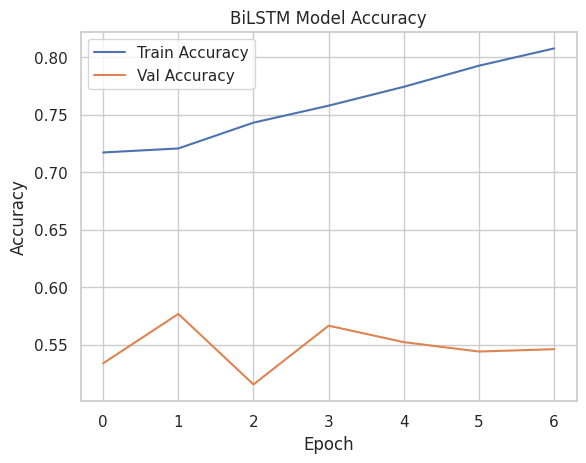

In [49]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

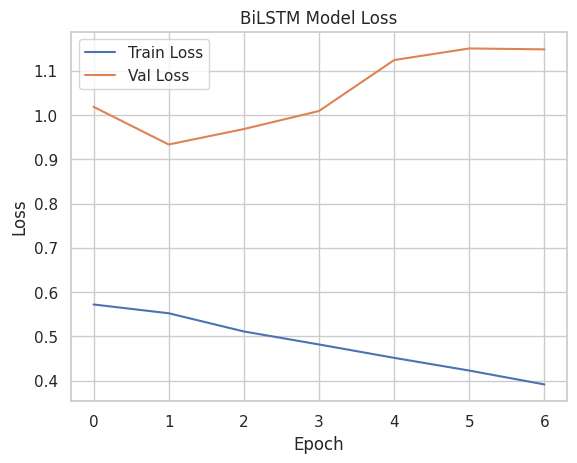

In [50]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Building the BERT Model

In [51]:
# Initialize project
wandb.init(project="bert-bilstm-twitter", name="bert-run-1")

In [52]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
MAX_LEN = 64

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [53]:
def encode_bert_inputs(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding='max_length', max_length=MAX_LEN)
    dataset = Dataset.from_dict({
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels
    })
    return dataset

In [54]:
# Prepare HuggingFace Dataset
train_dataset = encode_bert_inputs(train_texts, train_y)
test_dataset = encode_bert_inputs(test_texts, test_y)
val_dataset = encode_bert_inputs(val_texts, val_y)

In [55]:
# Evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [56]:
# Load model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_map))

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
# TrainingArguments with wandb logging
training_args = TrainingArguments(
    output_dir="./bert_results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_dir="./logs",
    report_to="wandb",
    run_name="bert-bilstm-sentiment"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [58]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [59]:
# Train
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.753400,0.758274,0.656442,0.667207,0.702292,0.656442
2,0.475700,0.918374,0.670757,0.662991,0.686237,0.670757
3,0.237700,1.159646,0.668712,0.669279,0.670779,0.668712


TrainOutput(global_step=1614, training_loss=0.4678033027507115, metrics={'train_runtime': 19469.1428, 'train_samples_per_second': 1.325, 'train_steps_per_second': 0.083, 'total_flos': 848343437109504.0, 'train_loss': 0.4678033027507115, 'epoch': 3.0})

Making Predictions

In [61]:
# Predict
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)

In [62]:
# True labels
true_labels = predictions.label_ids

In [63]:
# Classification Report
print(" Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=le.classes_))

 Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.84      0.73      1192
     neutral       0.74      0.62      0.67      1781
    positive       0.69      0.62      0.65       713

    accuracy                           0.69      3686
   macro avg       0.69      0.69      0.68      3686
weighted avg       0.70      0.69      0.69      3686



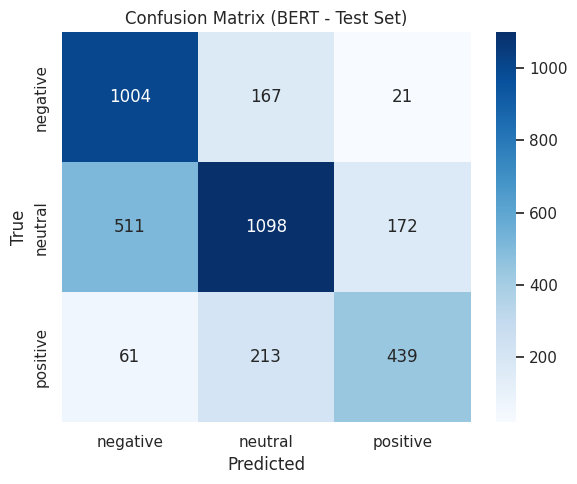

In [64]:
# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.title("Confusion Matrix (BERT - Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [67]:
# Define typo augmenter
typo_aug = nac.KeyboardAug()

In [70]:
# Apply to test_texts (original cleaned test set)
noisy_test_texts = [typo_aug.augment(text)[0] for text in test_texts]

In [71]:
# Encode noisy texts for BERT
encodings = tokenizer(noisy_test_texts, truncation=True, padding='max_length', max_length=64)
noisy_test_dataset = Dataset.from_dict({
    'input_ids': encodings['input_ids'],
    'attention_mask': encodings['attention_mask'],
    'labels': test_y
})

Predicting with Noise

In [72]:
noisy_preds = trainer.predict(noisy_test_dataset)
noisy_pred_labels = np.argmax(noisy_preds.predictions, axis=1)
noisy_true_labels = noisy_preds.label_ids


In [73]:
# Step 6: Evaluation Report
print(" Classification Report – BERT on Noisy Test Set:")
print(classification_report(noisy_true_labels, noisy_pred_labels, target_names=le.classes_))

 Classification Report – BERT on Noisy Test Set:
              precision    recall  f1-score   support

    negative       0.56      0.77      0.65      1192
     neutral       0.65      0.62      0.64      1781
    positive       0.70      0.34      0.45       713

    accuracy                           0.61      3686
   macro avg       0.64      0.58      0.58      3686
weighted avg       0.63      0.61      0.60      3686



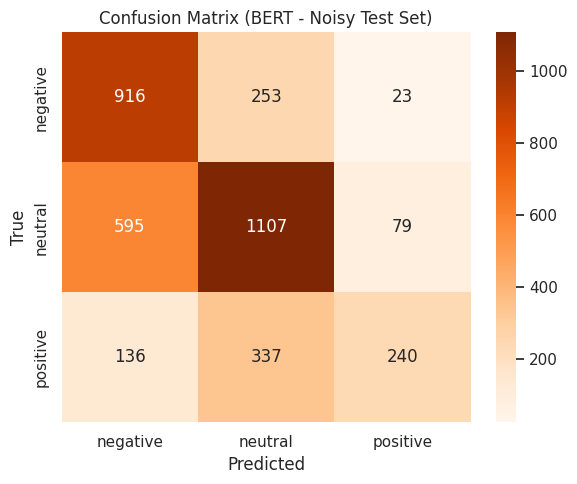

In [74]:
cm = confusion_matrix(noisy_true_labels, noisy_pred_labels)
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.title("Confusion Matrix (BERT - Noisy Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# The Rest...